In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

plt.style.use('default')
rcParams["figure.figsize"] = [10, 8]

In [3]:
%matplotlib inline

In [5]:
wine_df = pd.read_csv('/content/drive/MyDrive/ML_TermProject/wine_dataset.csv')
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.2,0.24,0.30,1.60,0.048,27.0,131.0,0.99330,3.25,0.45,10.5,5,white
1,5.7,1.13,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4,red
2,7.2,0.63,0.00,1.90,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6,red
3,6.4,0.31,0.38,2.90,0.038,19.0,102.0,0.99120,3.17,0.35,11.0,7,white
4,8.6,0.80,0.11,2.30,0.084,12.0,31.0,0.99790,3.40,0.48,9.9,5,red
5,8.0,0.26,0.36,2.00,0.054,30.0,121.0,0.99200,3.09,0.72,11.6,7,white
6,6.4,0.18,0.48,4.00,0.186,64.0,150.0,0.99450,3.06,0.40,9.3,5,white
7,7.2,0.66,0.03,2.30,0.078,16.0,86.0,0.99743,3.53,0.57,9.7,5,red
8,6.0,0.27,0.31,5.00,0.043,54.0,170.0,0.99240,3.28,0.52,11.0,6,white
9,6.3,0.22,0.43,4.55,0.038,31.0,130.0,0.99180,3.35,0.33,11.5,7,white


In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000
mean,7.324547,0.356915,0.313776,5.185319,0.058921,29.235528,109.561667,0.994908,3.227752,0.544104,10.478044,5.801074
std,1.376578,0.174870,0.150084,4.568603,0.037175,17.520729,58.643300,0.002919,0.162469,0.155090,1.183096,0.869187
min,4.200000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.500000,0.230000,0.240000,1.800000,0.039000,15.000000,61.000000,0.992660,3.120000,0.440000,9.500000,5.000000
50%,7.000000,0.310000,0.310000,2.700000,0.049000,27.000000,113.000000,0.995220,3.220000,0.520000,10.300000,6.000000
75%,7.800000,0.430000,0.400000,7.700000,0.072000,40.000000,152.000000,0.997100,3.330000,0.620000,11.300000,6.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,138.500000,366.500000,1.010300,4.010000,2.000000,14.900000,9.000000


In [7]:
print(wine_df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


<ipython-input-8-8a45aad8be59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(wine_df.corr(), annot=True)


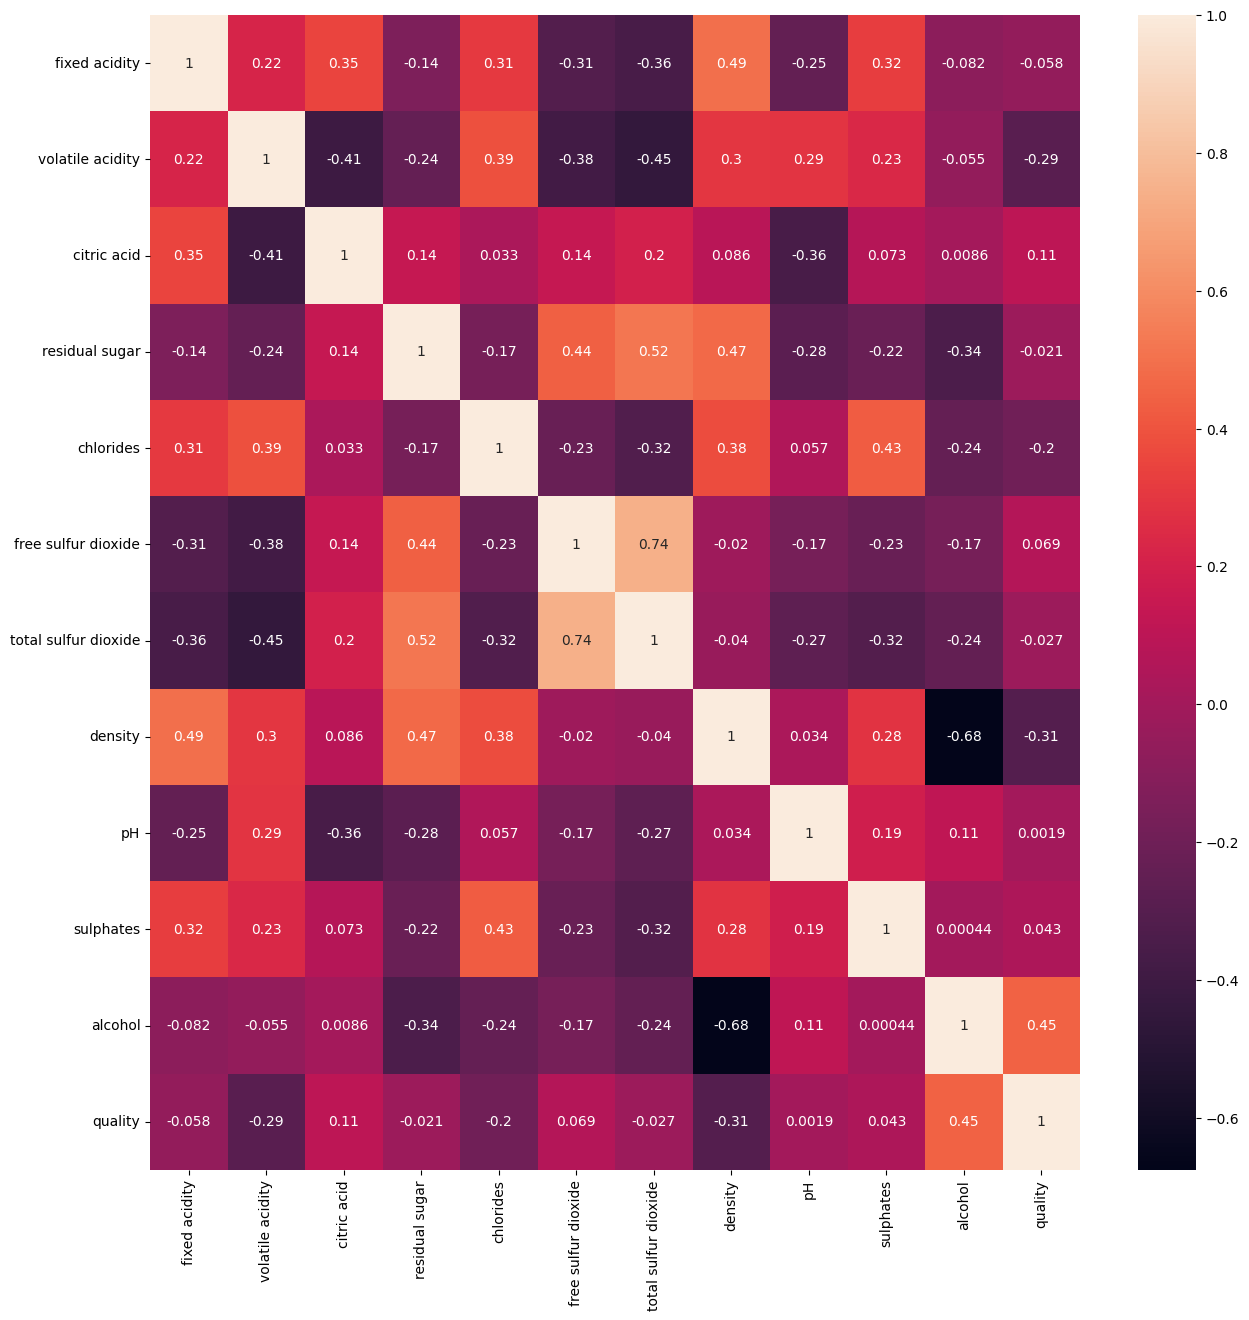

In [8]:
plt.figure(figsize=[15,15])
sb.heatmap(wine_df.corr(), annot=True)
plt.show()

In [14]:
X = wine_df.drop(['quality','type'], axis=1)
X = StandardScaler().fit_transform(X)
y = np.ravel(wine_df[['quality']])

In [15]:
print(X.shape)  # Check the shape of X

(5027, 11)


In [16]:
print(y.shape)  # Check the shape of y

(5027,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
svm = SVC()
svm = svm.fit(X_train, y_train)